In [22]:
import scipy as sc
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier

In [23]:
df = pd.read_csv('C:/Users/arlan/OneDrive/Desktop/datasets/credit/credits.csv')
df.head()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1000 non-null   int64 
 1   'checking_status'         1000 non-null   object
 2   'duration'                1000 non-null   int64 
 3   'credit_history'          1000 non-null   object
 4   'purpose'                 1000 non-null   object
 5   'credit_amount'           1000 non-null   int64 
 6   'savings_status'          1000 non-null   object
 7   'employment'              1000 non-null   object
 8   'installment_commitment'  1000 non-null   int64 
 9   'personal_status'         1000 non-null   object
 10  'other_parties'           1000 non-null   object
 11  'residence_since'         1000 non-null   int64 
 12  'property_magnitude'      1000 non-null   object
 13  'age'                     1000 non-null   int64 
 14  'other_payment_plans'    

In [25]:
df.drop_duplicates(inplace = True)

Кодирование категориальных признаков:

In [26]:
cols = df.columns
numeroic = []
categoric = []
for i in cols:
    if df[i].dtype == 'int64':
        numeroic.append(i)
    else:
        categoric.append(i)
L_E = LabelEncoder()
for i in categoric:
    df[i] = L_E.fit_transform(df[i].tolist())

In [27]:
df.head()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,1,1,6,1,6,1169,4,3,4,3,...,3,67,1,1,2,1,1,1,1,1
1,2,0,48,3,6,5951,2,0,2,0,...,3,22,1,1,1,1,1,0,1,0
2,3,3,12,1,2,2096,2,1,2,3,...,3,49,1,1,1,3,2,0,1,1
3,4,1,42,3,3,7882,2,1,2,3,...,1,45,1,0,1,1,2,0,1,1
4,5,1,24,2,4,4870,2,0,3,3,...,2,53,1,0,2,1,2,0,1,0


________________________________________
Проверка скоррелированности данных

<Axes: >

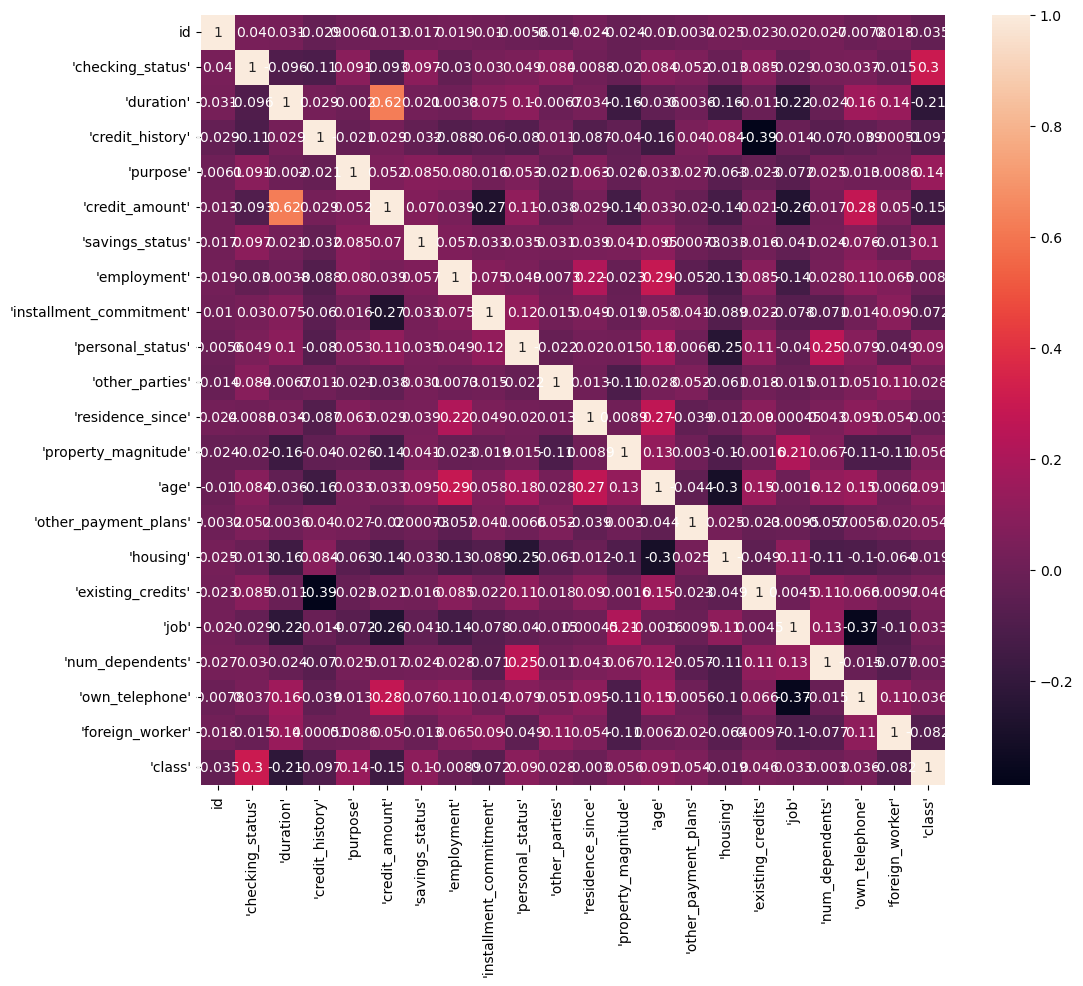

In [28]:
corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr,  annot=True)

In [29]:
df.describe()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.582000,20.903000,2.219000,4.484000,3271.258000,2.1450,1.525000,2.973000,1.878000,...,1.386000,35.546000,0.908000,1.071000,1.407000,1.274000,1.155000,0.404000,0.963000,0.700000
std,288.819436,1.253334,12.058814,1.064035,2.421075,2822.736876,1.1114,1.344315,1.118715,1.350904,...,1.210979,11.375469,0.421561,0.531264,0.577654,0.946478,0.362086,0.490943,0.188856,0.458487
min,1.000000,0.000000,4.000000,0.000000,0.000000,250.000000,0.0000,0.000000,1.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,12.000000,1.000000,3.000000,1365.500000,2.0000,0.000000,2.000000,0.000000,...,0.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,500.500000,1.000000,18.000000,3.000000,4.000000,2319.500000,2.0000,1.000000,3.000000,3.000000,...,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,750.250000,3.000000,24.000000,3.000000,6.000000,3972.250000,2.0000,3.000000,4.000000,3.000000,...,3.000000,42.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,3.000000,72.000000,4.000000,9.000000,18424.000000,4.0000,4.000000,4.000000,3.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': "'checking_status'"}>,
        <Axes: title={'center': "'duration'"}>,
        <Axes: title={'center': "'credit_history'"}>,
        <Axes: title={'center': "'purpose'"}>],
       [<Axes: title={'center': "'credit_amount'"}>,
        <Axes: title={'center': "'savings_status'"}>,
        <Axes: title={'center': "'employment'"}>,
        <Axes: title={'center': "'installment_commitment'"}>,
        <Axes: title={'center': "'personal_status'"}>],
       [<Axes: title={'center': "'other_parties'"}>,
        <Axes: title={'center': "'residence_since'"}>,
        <Axes: title={'center': "'property_magnitude'"}>,
        <Axes: title={'center': "'age'"}>,
        <Axes: title={'center': "'other_payment_plans'"}>],
       [<Axes: title={'center': "'housing'"}>,
        <Axes: title={'center': "'existing_credits'"}>,
        <Axes: title={'center': "'job'"}>,
        <Axes: title={'center': "'num_dependents'"}>,
        <Ax

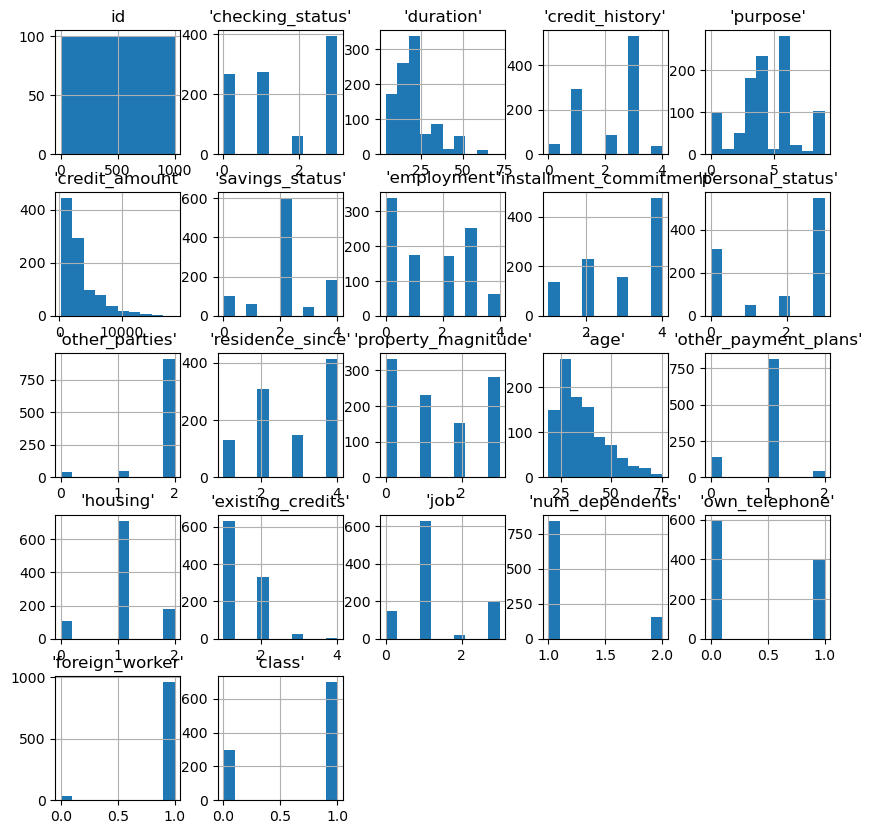

In [30]:
df.hist(figsize = (10,10))

____________________________
Масштабирование признаков с помощью нормализации

In [31]:
scaler = MinMaxScaler(copy=True)
credits = pd.DataFrame(scaler.fit_transform(df), columns=cols)

<Axes: ylabel='Density'>

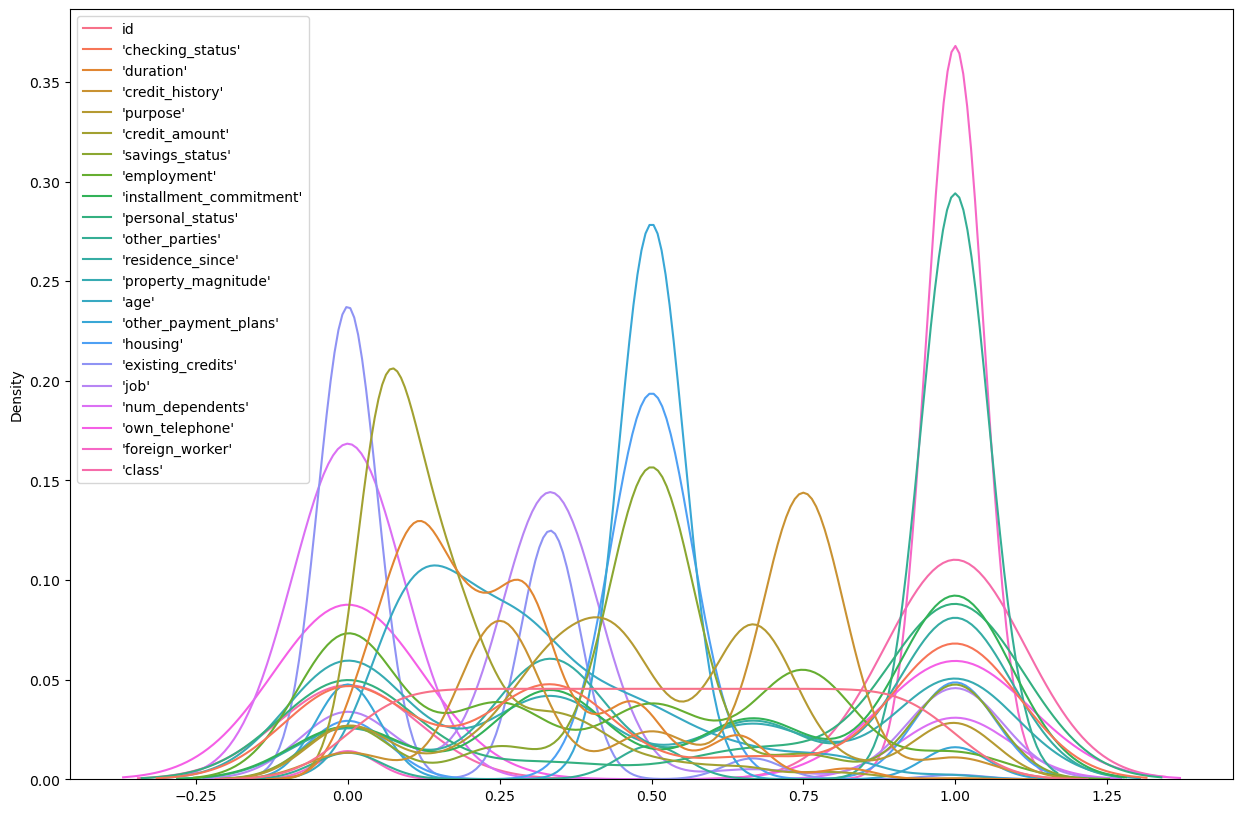

In [32]:
plt.figure(figsize = (15,10))
sns.kdeplot(credits)

In [33]:
credits.describe()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.500000,0.527333,0.248574,0.554750,0.498222,0.166241,0.53625,0.381250,0.657667,0.626000,...,0.462000,0.295464,0.454000,0.535500,0.135667,0.424667,0.155000,0.404000,0.963000,0.700000
std,0.289109,0.417778,0.177336,0.266009,0.269008,0.155317,0.27785,0.336079,0.372905,0.450301,...,0.403660,0.203133,0.210781,0.265632,0.192551,0.315493,0.362086,0.490943,0.188856,0.458487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.117647,0.250000,0.333333,0.061379,0.50000,0.000000,0.333333,0.000000,...,0.000000,0.142857,0.500000,0.500000,0.000000,0.333333,0.000000,0.000000,1.000000,0.000000
50%,0.500000,0.333333,0.205882,0.750000,0.444444,0.113871,0.50000,0.250000,0.666667,1.000000,...,0.333333,0.250000,0.500000,0.500000,0.000000,0.333333,0.000000,0.000000,1.000000,1.000000
75%,0.750000,1.000000,0.294118,0.750000,0.666667,0.204812,0.50000,0.750000,1.000000,1.000000,...,1.000000,0.410714,0.500000,0.500000,0.333333,0.333333,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X = credits.drop(["'class'"],axis = 1)
Y = credits["'class'"]
smote = SMOTE()
sm_X,sm_Y = smote.fit_resample(X,Y)

In [35]:
cv = RepeatedStratifiedKFold(random_state=42)

___________________________________________________
Используем Smote для балансировки данных

In [36]:
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(sm_X, sm_Y, stratify = sm_Y, random_state = 42)

____________________________________
Разберем различные классификаторы для данного примера.
Начнем с простейшего - Dummy

In [37]:
dummy = DummyClassifier()
scores = cross_val_score(dummy, 
                         sm_X, sm_Y, 
                         scoring = 'matthews_corrcoef', 
                         cv = cv, 
                         n_jobs = -1)

In [38]:
print('Matthews_corrcoef = ', sum(scores)/len(scores))

Matthews_corrcoef =  0.0


____________
Stochastic Gradient Descent Classifier

In [39]:
params_sgd={"loss":['hinge', 'log_loss','modified_huber','squared_hinge','perceptron','squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
           "penalty":['l2', 'l1', 'elasticnet', None],
           "max_iter":[1000,10000,100000]}

In [40]:
sgd=SGDClassifier()

In [41]:
grid=GridSearchCV(sgd,params_sgd)
grid.fit(x_train_balanced,y_train_balanced)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge', 'perceptron',
                                  'squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [1000, 10000, 100000],
                         'penalty': ['l2', 'l1', 'elasticnet', None]})

In [42]:
grid.best_params_

{'loss': 'huber', 'max_iter': 100000, 'penalty': 'elasticnet'}

In [43]:
sgd = SGDClassifier(loss = 'huber',
                  max_iter = 1000,
                  penalty = 'l1',
                  random_state = 42)
scores = cross_val_score(sgd, 
                         sm_X, sm_Y,  
                         scoring = 'matthews_corrcoef', 
                         cv = cv, 
                         n_jobs = -1)

In [44]:
print('Matthews_corrcoef = ', sum(scores)/len(scores))

Matthews_corrcoef =  0.3818437470624578


________________
KNN Classifier

In [45]:
kn = KNeighborsClassifier(weights = 'distance')
scores = cross_val_score(kn, 
                         sm_X, sm_Y, 
                         scoring = 'matthews_corrcoef', 
                         cv = cv, 
                         n_jobs = -1)

In [46]:
print('Matthews_corrcoef = ', sum(scores)/len(scores))

Matthews_corrcoef =  0.5554224500310725


________
Random Forest Classifier

In [47]:
forest=RandomForestClassifier(max_depth = 30,
                              min_samples_split = 5,
                              n_estimators = 130,
                              random_state = 42)
scores = cross_val_score(kn, 
                         sm_X, sm_Y, 
                         scoring = 'matthews_corrcoef', 
                         cv = cv, 
                         n_jobs = -1)

In [48]:
print('Matthews_corrcoef = ', sum(scores)/len(scores))

Matthews_corrcoef =  0.5554224500310725


______________________
GradientBoostingClassifier

In [49]:
gb = LGBMClassifier(n_estimators = 420, 
                    objective = 'binary', 
                    random_state = 42)
scores = cross_val_score(gb, 
                         sm_X, sm_Y, 
                         scoring = 'matthews_corrcoef', 
                         cv = cv, 
                         n_jobs = -1)

In [50]:
print('Matthews_corrcoef = ', sum(scores)/len(scores))

Matthews_corrcoef =  0.6652351755077635


_____________
Linear Support Vector Machine

In [51]:
svm=LinearSVC(random_state = 42, 
              max_iter = 5000)
scores = cross_val_score(gb, 
                         sm_X, sm_Y, 
                         scoring = 'matthews_corrcoef', 
                         cv = cv, 
                         n_jobs = -1)

In [52]:
print('Matthews_corrcoef = ', sum(scores)/len(scores))

Matthews_corrcoef =  0.6652351755077635


______________
Logistic Regression

In [53]:
logreg = LogisticRegression(penalty = 'l1',
                          C = 0.1,
                          solver = 'liblinear',
                          random_state = 42)
scores = cross_val_score(gb, 
                         sm_X, sm_Y, 
                         scoring = 'matthews_corrcoef', 
                         cv = cv, 
                         n_jobs = -1)

In [54]:
print(sum(scores)/len(scores))

0.6652351755077635
